### one-way annova test

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chisquare


## loading the dataset here

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url).dropna(subset=['Age'])  ### removing missing values of age here...

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
## here we will do the one-way annova test
!pip install statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

# making pclass as  categorical 
df['Pclass'] = df['Pclass'].astype('category')

# fitting the ANOVA model using C(Pclass) to treat it as a category
model = ols('Age ~ C(Pclass)', data=df).fit()

# running the annova test
anova_result = sm.stats.anova_lm(model, typ=2)

## printing the result
print(anova_result)



                  sum_sq     df          F        PR(>F)
C(Pclass)   20929.627754    2.0  57.443484  7.487984e-24
Residual   129527.008190  711.0        NaN           NaN


### this is the scenario where you reject the null hypothesis

### now let's see Tuckey's HSD (to check how much is the difference) which pairs are significantly different

,0,1,2,3,4,5,6
0,group1,group2,meandiff,p-adj,lower,upper,reject
1,1,2,-8.3558,0.0,-11.7041,-5.0075,True
2,1,3,-13.0928,0.0,-15.9622,-10.2234,True
3,2,3,-4.737,0.0005,-7.6763,-1.7977,True


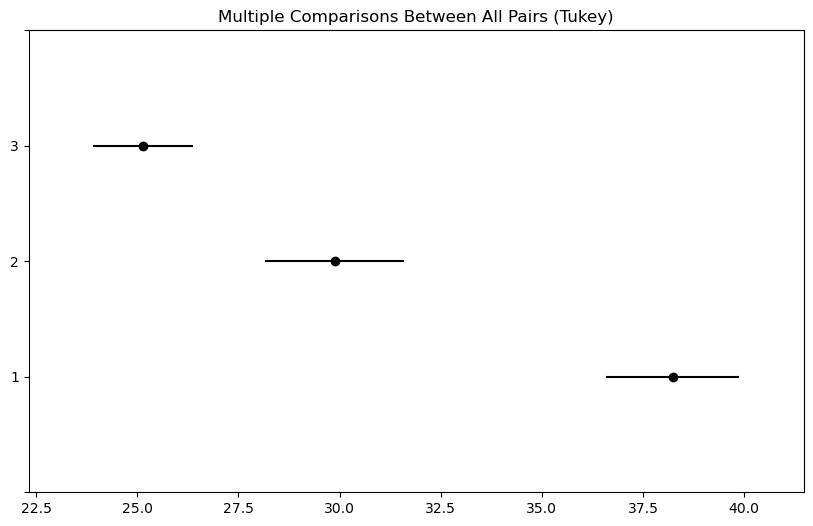

In [6]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

tukey = pairwise_tukeyhsd(endog=df['Age'], groups=df['Pclass'], alpha=0.05)

tukey.plot_simultaneous()

plt.vlines(x=50, ymin= -0.5, ymax=4.5,  color= "red")

pd.DataFrame(tukey.summary())

### we can see 1,3  is too far from each other, so it says that there is difference....2,3 is bit closer but still significantly different.....